#First of all import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#Read the CSv File

In [2]:
df=pd.read_csv('/content/Crop Production data.csv')

#Now find Shape

In [3]:
df.shape

(246091, 7)

#Find the Row and Columns

In [4]:
df.shape[0]

246091

In [5]:
df.shape[1]

7

# Find Starting Index and Show all the Columns

In [6]:
df.index

RangeIndex(start=0, stop=246091, step=1)

In [7]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

#To get Familiar with data show the 1st 5 and last 5 rows

In [8]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [9]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


#Find the Datatypes and Mem Usage

In [10]:
#Mem Usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [11]:
#Datatypes
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

#Find Missing or Null Values

In [12]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

#Drop Null values

In [13]:
df.dropna(inplace=True)

In [14]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


#First create a plot of Crops year, Area and Production

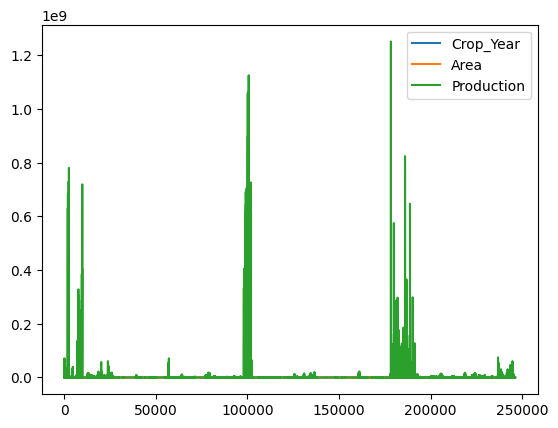

In [15]:
df.plot()
plt.show()

#Overall Crop production By State

In [16]:
overall=df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(overall, 'State_Name', 'Production',color='State_Name')


##Observations: From the above plot we can see that Kerala is the highest crop producing state overall

#Overall Production Throughout the years

In [17]:
t=df.groupby(by='Crop_Year')['Production'].sum().reset_index()
px.line(t, 'Crop_Year','Production')


#Average crop Area through Years

In [18]:
temp=df.groupby(by='Crop_Year')['Area'].mean().reset_index()
px.scatter(temp, 'Crop_Year', 'Area', color='Area',size='Area')

#Make a bar chart for crop group by production

In [19]:
t=df.groupby(by='Crop').sum().reset_index().sort_values(by='Production')
px.bar(t.tail(), 'Crop', 'Production')

##Coconut is the most produced crop and Kerala is the most producing state.

#Top States which has zero production

In [20]:
df[df['Production']==0].head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
397,Andhra Pradesh,ANANTAPUR,2002,Kharif,Soyabean,51.0,0.0
424,Andhra Pradesh,ANANTAPUR,2002,Whole Year,Cucumber,18.0,0.0
428,Andhra Pradesh,ANANTAPUR,2002,Whole Year,other fibres,132.0,0.0
430,Andhra Pradesh,ANANTAPUR,2002,Whole Year,Other Vegetables,1767.0,0.0
481,Andhra Pradesh,ANANTAPUR,2003,Whole Year,Cucumber,51.0,0.0
486,Andhra Pradesh,ANANTAPUR,2003,Whole Year,Other Vegetables,1783.0,0.0
1203,Andhra Pradesh,CHITTOOR,2002,Whole Year,Cabbage,4.0,0.0
1208,Andhra Pradesh,CHITTOOR,2002,Whole Year,Cucumber,8.0,0.0
1213,Andhra Pradesh,CHITTOOR,2002,Whole Year,Other Vegetables,918.0,0.0
1215,Andhra Pradesh,CHITTOOR,2002,Whole Year,Peas (vegetable),1.0,0.0


##Observations: These are the Top 10 States which has zero Production

In [21]:
df[df['Production']==0].shape[0]

3523

##There are 3523 states which has zero production

# Create a bar chart to visualizes crop production across different seasons.

<Axes: xlabel='Season', ylabel='Production'>

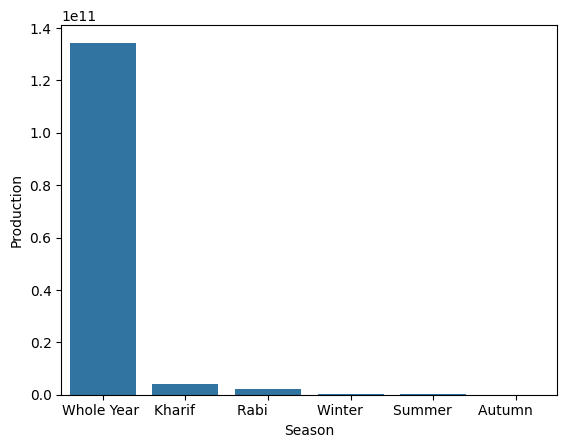

In [22]:
season_budget=df.groupby('Season')['Production'].sum().sort_values(ascending=False)
sns.barplot(y=season_budget,x=season_budget.index)

In [23]:
df['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

#Create a Piechart for Crop Production Excluding Coconut

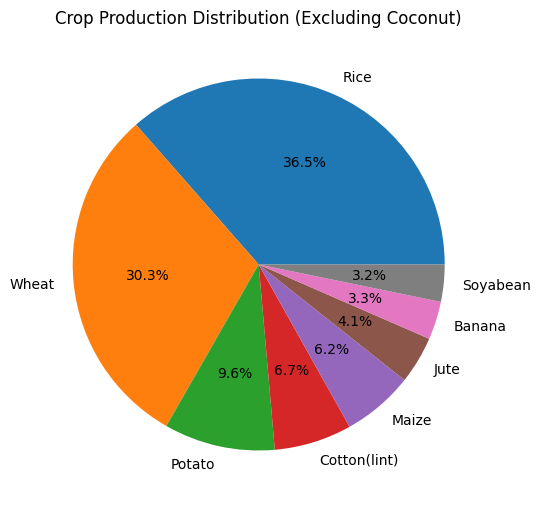

In [24]:
plt.figure(figsize=(6,8))
pro=df.groupby('Crop')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)[2:10]
plt.pie(pro['Production'], labels=pro['Crop'], autopct='%1.1f%%')
plt.title('Crop Production Distribution (Excluding Coconut)')
plt.show()

##Observations: From the above piechart we can see the crop production other than Coconut

#Create a bar chart to show the top 14 Crop production states other than Kerala

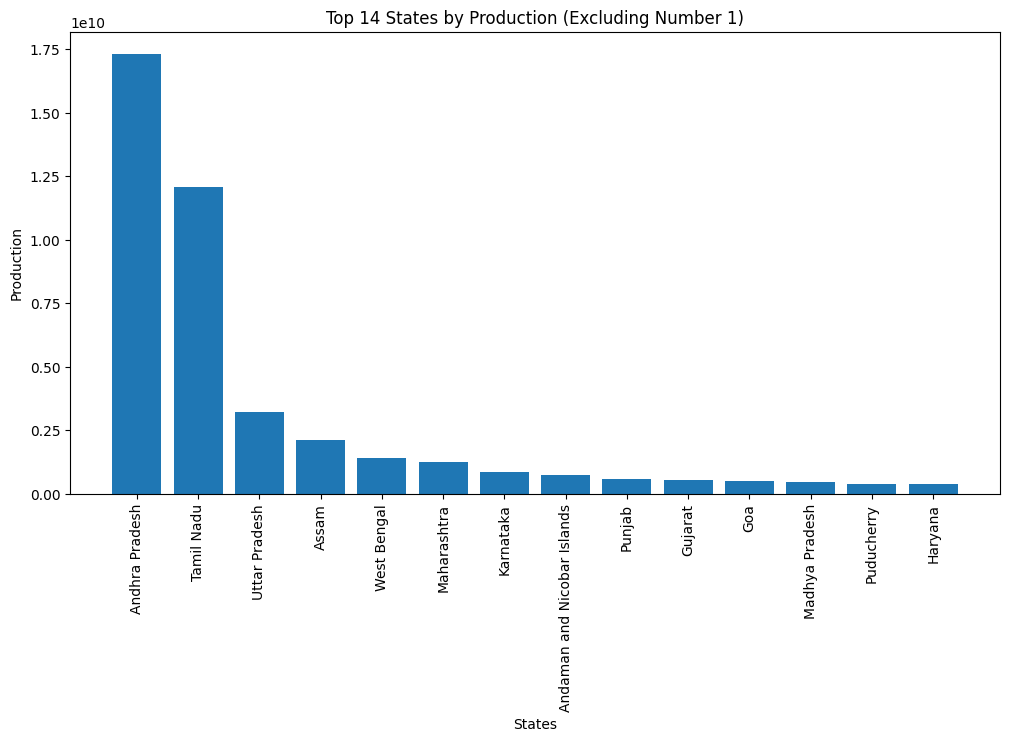

In [25]:
sp = df.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(15)[1:]
plt.figure(figsize=(12, 6))
plt.bar(sp.index, sp)
plt.xlabel('States')
plt.ylabel('Production')
plt.title('Top 14 States by Production (Excluding Number 1)')
plt.xticks(rotation=90)
plt.show()


#Create a boxplot to find Crop production per year

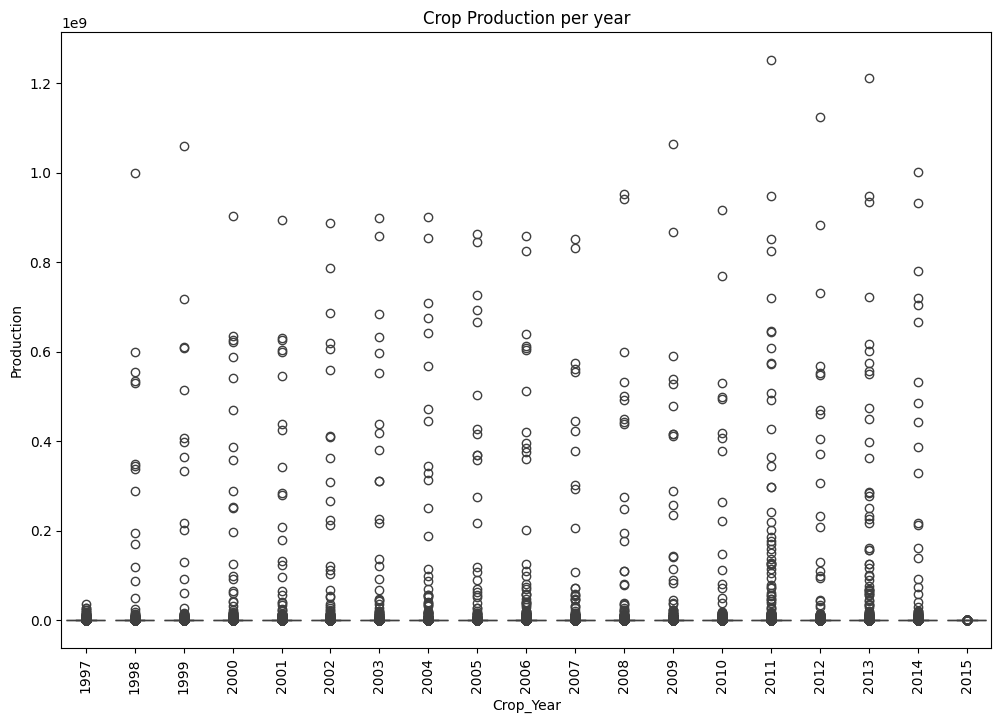

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df["Crop_Year"],y=df["Production"])
plt.title('Crop Production per year')
plt.xticks(rotation=90)
plt.show()


#Find wheat production throughout the seasons

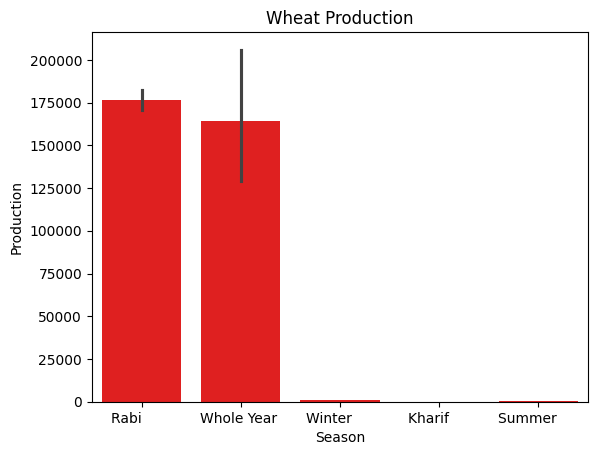

In [27]:
wheat = df[df['Crop'] == 'Wheat']
plt.title('Wheat Production')
sns.barplot(x=wheat["Season"], y=wheat["Production"],data=wheat,color='red')
plt.show()

#Create a Scatterplot of Production of Rice in Different Areas

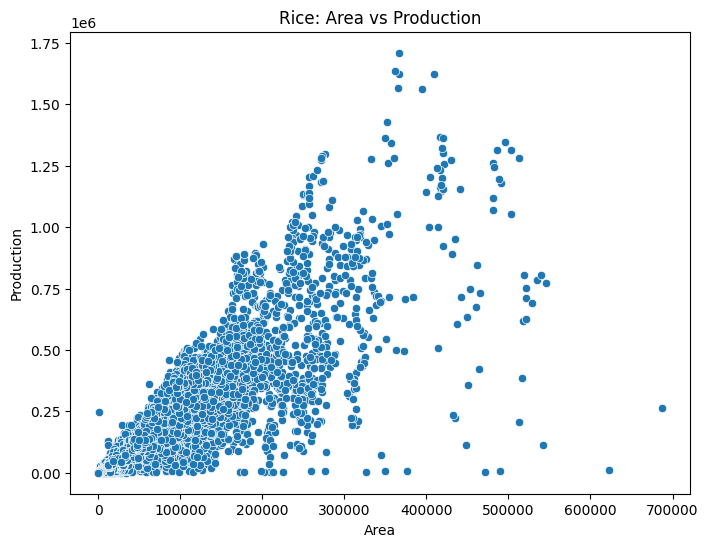

In [28]:
rice = df[df['Crop'] == 'Rice']
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rice, x='Area', y='Production')
plt.title('Rice: Area vs Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()